In [4]:
import os

directory = './train/GT'

# Function to remove underscores from file names in a directory
def remove_underscores(directory):
    # List all files in the directory
    files = os.listdir(directory)

    # Rename files to remove underscores
    for filename in files:
        if '_' in filename:
            new_filename = filename.replace('_', '')
            old_path = os.path.join(directory, filename)
            new_path = os.path.join(directory, new_filename)
            os.rename(old_path, new_path)
            print(f'Renamed: {old_path} -> {new_path}')

# Call the function to remove underscores
remove_underscores(directory)


Renamed: ./train/GT\01_.png -> ./train/GT\01.png
Renamed: ./train/GT\02_.png -> ./train/GT\02.png
Renamed: ./train/GT\04_.png -> ./train/GT\04.png
Renamed: ./train/GT\05_.png -> ./train/GT\05.png
Renamed: ./train/GT\06_.png -> ./train/GT\06.png
Renamed: ./train/GT\07_.png -> ./train/GT\07.png
Renamed: ./train/GT\08_.png -> ./train/GT\08.png
Renamed: ./train/GT\09_.png -> ./train/GT\09.png
Renamed: ./train/GT\100_.png -> ./train/GT\100.png
Renamed: ./train/GT\102_.png -> ./train/GT\102.png
Renamed: ./train/GT\103_.png -> ./train/GT\103.png
Renamed: ./train/GT\104_.png -> ./train/GT\104.png
Renamed: ./train/GT\105_.png -> ./train/GT\105.png
Renamed: ./train/GT\106_.png -> ./train/GT\106.png
Renamed: ./train/GT\107_.png -> ./train/GT\107.png
Renamed: ./train/GT\108_.png -> ./train/GT\108.png
Renamed: ./train/GT\109_.png -> ./train/GT\109.png
Renamed: ./train/GT\10_.png -> ./train/GT\10.png
Renamed: ./train/GT\111_.png -> ./train/GT\111.png
Renamed: ./train/GT\112_.png -> ./train/GT\112.pn

float32


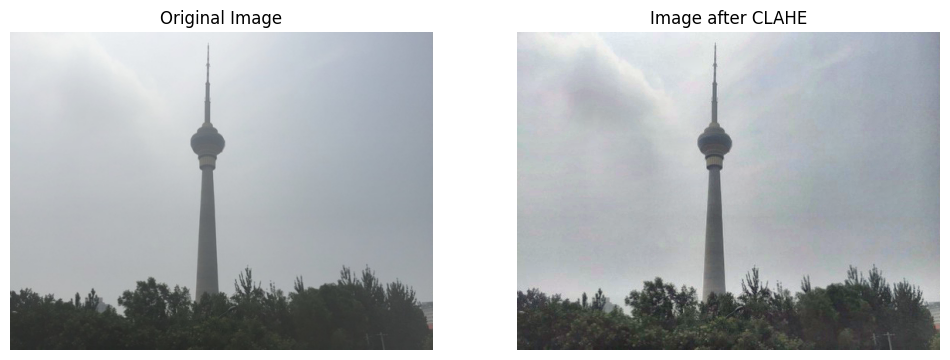

In [58]:
import numpy as np
from skimage import exposure

def apply_ahe(img):
    # Convert image to float in range [0, 1]
    img_float = img.astype(np.float32) / 255.0

    # Apply AHE to each channel separately
    img_ahe = np.zeros_like(img_float)
    for i in range(img_float.shape[2]):
        img_ahe[:, :, i] = exposure.equalize_adapthist(img_float[:, :, i], clip_limit=0.03)

    

    return img_ahe

def apply_clahe(img):

    img = img * 255.0
    img = img.astype(np.uint8)
    
    r, g, b = cv2.split(img)
    
    # Create a CLAHE object (Clip Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    
    # Apply CLAHE to each channel separately
    r_clahe = clahe.apply(r)
    g_clahe = clahe.apply(g)
    b_clahe = clahe.apply(b)
    
    # Merge the CLAHE enhanced channels
    img_clahe = cv2.merge((r_clahe, g_clahe, b_clahe))

    img_clahe = img_clahe.astype(np.float32) / 255.0
    
    return img_clahe



import os
import cv2
from matplotlib import pyplot as plt

directory = './test/hazy'


files = os.listdir(directory)

# Rename files to remove underscores

i =0
# for filename in files:
img = cv2.imread(os.path.join(directory, "313.png"))
img =  img[:, :, ::-1].astype('float32')/255.0

imOG = img

img = apply_clahe(img)

print(img.dtype)

image_rgb = img

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Original image
axes[0].imshow(imOG)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Image after AHE
axes[1].imshow(image_rgb)
axes[1].set_title('Image after CLAHE')
axes[1].axis('off')

plt.show()
i+=1
    # if(i == 5):
    #     break

    


